# **Smart Parking Lot Occupancy Prediction**

Smart Parking Lot occupancy Prediction will detect whether the parking space is occupied or empty. In this project we are using two deep learning technique :- 
  1. mAlexNet 
  2. AlexNet. 

For This project we are using 2 different type of dataset:-  
  1. PKLot dataset
    *   UFPR04
    *   UFPR05
    *   PUC
  2. CNR Dataset 

In this project, we are using pretrained dataset trained on each deep learning model.  

In [ ]:
# Load Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Python Files from the folder 


1.   mAlexnet is the python file in which mAlexnet model is define 
2.   Alexnet is the python file in which Alexnet model is define
3.   Dataloader is the python file that load dataset from the folder for training the model 
4.   Train function is use to train the dataset. Train function takes the input (number of Iteration(epoch), train_image, train_label, model) and gives ouput as number of epoch with training batch and loss.
5.   Test function is use to test the dataset. Test function takes the input (test_image, test_label, transform, mdoel) 





In [ ]:
# Importing the required Python Files 
#-------------------------------------------------------------------------------------------------------
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/PKLot_Project')

from model.malexnet import mAlexNet
from model.alexnet import AlexNet
from utils.dataloader import selfData
from utils.train import train
from utils.test import test

### Importing Python Libraies
 

In [1]:
# Load Python Libraies
#-------------------------------------------------------------------------------------------------------
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### Transform Data according to the Deep learning model requirements

1.    Torch Device will check whether GPU is available or not if GPU is not available then torch device will use CPU.
2.    Transforms function will trasform input image into a specfic format (for example it will transform image into 256 * 256 pixel)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),  # normalize to [0, 1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) 

In [ ]:
# Load mAlexnet and AlexNet Deep Learning Model
#-------------------------------------------------------------------------------------------------------
mAlexNet_1 = mAlexNet().to(device)
AlexNet_1 = AlexNet().to(device)


# ***PKLot Dataset***



*   Here We are Using PKlot Dataset as a Training and Testing 

*   PKLot Dataset is divided into 3 sub part 

    1.   UFPR04
    2.   UFPR05
    3.   PUC

*   Each sub part contain 3 Different Weather (Sunny, Cloudy and Rainy)

*   We have implement 2 Deep learning Model (AlexNet and mAlexNet)

*   Each Deep learning Model is using PKLot Dataset for  Training and Testing.


### **PKLot (UFPR04) Dataset used on mAlexNet**

In [ ]:
#Load Train and Test image from the google drive folder along with image label
#-------------------------------------------------------------------------------------------------------
epochs = 18
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR04_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR04_test.txt'

In [ ]:
#Trained the image from the google drive folder along with image label
#-------------------------------------------------------------------------------------------------------
# criterion = nn.CrossEntropyLoss()
# train(epochs, train_img, train_lab, transforms, mAlexNet_1, criterion)
# PATH = './model.pth'
# torch.save(net.state_dict(), PATH)
# mAlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# Path variable will takes Pretrained dataset trained using mAlexNet model
# That Pretrained Dataset will be loaded into mAlexNet model. 
# Here we are using PKLot(UFPR04) Dataset
#-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/04_mAlexnet.pth'
# mAlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# Test funtcion will test the dataset and print accuracy base on training and testing. 
mPKLot_U04_accuracy = test(test_img, test_lab, transforms, mAlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], mPKLot_U04_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **PKLot (UFPR04) Dataset used on AlexNet**

In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR04_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR04_test.txt'

In [ ]:
# # Path variable will takes Pretrained dataset trained using AlexNet model
# # That Pretrained Dataset will be loaded into AlexNet model.
# # Here we are using PKLot(UFPR04) Dataset
# #-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/04_Alexnet.pth'
# AlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
aPKLot_U04_accuracy = test(test_img, test_lab, transforms, AlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], aPKLot_U04_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **PKLot (UFPR05) Dataset used on mAlexNet**

In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR05_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR05_test.txt'

In [ ]:
# # Path variable will takes Pretrained dataset trained using mAlexNet model
# # That Pretrained Dataset will be loaded into mAlexNet model.
# # Here we are using PKLot(UFPR05) Dataset
# #-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/05_mAlexnet.pth'
# mAlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
mPKLot_U05_accuracy = test(test_img, test_lab, transforms, mAlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], mPKLot_U05_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **PKLot (UFPR05) Dataset used on AlexNet**

In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR05_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/UFPR05_test.txt'

In [ ]:
# # Path variable will takes Pretrained dataset trained using AlexNet model
# # That Pretrained Dataset will be loaded into AlexNet model.
# # Here we are using PKLot(UFPR05) Dataset
# #-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/05_Alexnet.pth'
# AlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
aPKLot_U05_accuracy = test(test_img, test_lab, transforms, AlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], aPKLot_U05_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **PKLot (PUC) Dataset used on mAlexNet**

In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/PUC_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/PUC_test.txt'

In [ ]:
# # Path variable will takes Pretrained dataset trained using mAlexNet model. 
# # That Pretrained Dataset will be loaded into mAlexNet model.
# # Here we are using PKlot (PUC) dataset
# #-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/PUC_mAlexnet.pth'
# mAlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
mPKLot_PUC_accuracy = test(test_img, test_lab, transforms, mAlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], mPKLot_PUC_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **PKLot (PUC) Dataset used on AlexNet**

In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/PUC_train.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/PKLot/PKLotSegmented'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/PKLot/PUC_test.txt'

In [ ]:
# # Path variable will takes Pretrained dataset trained using AlexNet model
# # That Pretrained Dataset will be loaded into AlexNet model.
# # Here we are using PKLot(PUC) Dataset
# #-------------------------------------------------------------------------------------------------------
# PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/05_Alexnet.pth'
# AlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
aPKLot_PUC_accuracy = test(test_img, test_lab, transforms, AlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], aPKLot_PUC_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin


# ***CNRPark Dataset***



*   Here We are Using CNRPark Dataset as a Training and Testing 
*   We have implement 2 Deep learning Model (AlexNet and mAlexNet)

*   Each Deep learning Model is using CNRPark Dataset for  Training and Testing.







In [ ]:
# #Load Train and Test image from the google drive folder along with image label
# #-------------------------------------------------------------------------------------------------------
train_img = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/CNRPark'
train_lab = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/CNRParkAB/even.txt'
test_img  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/CNRPark'
test_lab  = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/splits/CNRParkAB/even.txt'

### **CNR Dataset used on AlexNet**

In [ ]:
#Trained the image from the google drive folder along with image label
#-------------------------------------------------------------------------------------------------------
# criterion = nn.CrossEntropyLoss()
# train(epochs, train_img, train_lab, transforms, AlexNet_1, criterion)
# PATH = '/content/pretrained_model/CNR_model.pth'
# torch.save(net.state_dict(), PATH)
# AlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Path variable will takes Pretrained dataset trained using AlexNet model
# # That Pretrained Dataset will be loaded into AlexNet model.
# # Here we are using CNR Dataset
# #-------------------------------------------------------------------------------------------------------
PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/CNRPark.pth'
AlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
aCNR_accuracy = test(test_img, test_lab, transforms, AlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], aCNR_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

### **CNR Dataset used on mAlexNet**

In [ ]:
# # Path variable will takes Pretrained dataset trained using mAlexNet model
# # That Pretrained Dataset will be loaded into mAlexNet model.
# # Here we are using CNR Dataset
# #-------------------------------------------------------------------------------------------------------
PATH = '/content/drive/MyDrive/Colab Notebooks/PKLot_Project/trained_model/CNRPark_mAlexnet.pth'
mAlexNet_1.load_state_dict(torch.load(PATH))

In [ ]:
# # Test funtcion will test the dataset and print accuracy base on training and testing. 
# #-------------------------------------------------------------------------------------------------------
mCNR_accuracy = test(test_img, test_lab, transforms, mAlexNet_1)
print("\nThe accuracy of training on '{}' and testing on '{}' is {:.3f}.".format(train_lab.split('.')[0], test_lab.split('.')[0], mCNR_accuracy))


Testing starts now...
Testing on batch 1
Testing on batch 2
Testing on batch 3
Testing on batch 4
Testing on batch 5
Testing on batch 6
Testing on batch 7
Testing on batch 8
Testing on batch 9
Testing on batch 10
Testing on batch 11
Testing on batch 12
Testing on batch 13
Testing on batch 14
Testing on batch 15
Testing on batch 16
Testing on batch 17
Testing on batch 18
Testing on batch 19
Testing on batch 20
Testing on batch 21
Testing on batch 22
Testing on batch 23
Testing on batch 24
Testing on batch 25
Testing on batch 26
Testing on batch 27
Testing on batch 28
Testing on batch 29
Testing on batch 30
Testing on batch 31
Testing on batch 32
Testing on batch 33
Testing on batch 34
Testing on batch 35
Testing on batch 36
Testing on batch 37
Testing on batch 38
Testing on batch 39
Testing on batch 40
Testing on batch 41
Testing on batch 42
Testing on batch 43
Testing on batch 44
Testing on batch 45
Testing on batch 46
Testing on batch 47
Testing on batch 48
Testing on batch 49
Testin

# ***Plot the accuracy of the Dataset***

Here we have used matplotlib python library for ploting.


*   Ploted bar graph as 
*   List item



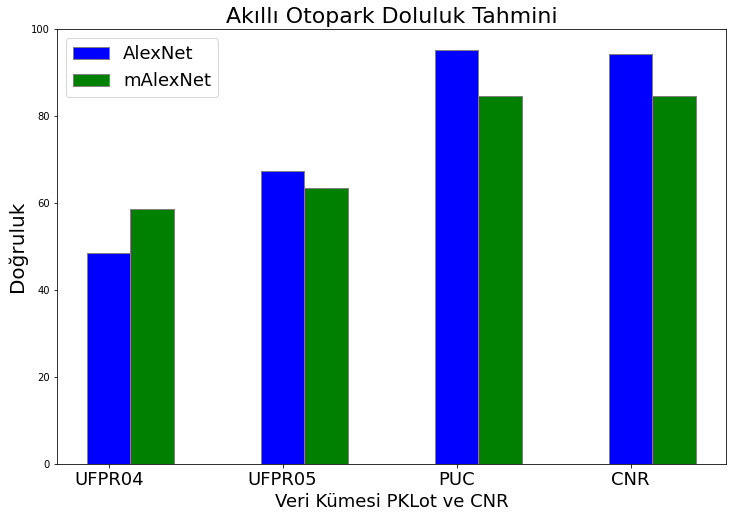

In [3]:
data_alex = [aPKLot_U04_accuracy, aPKLot_U05_accuracy, aPKLot_PUC_accuracy, aCNR_accuracy]
alex_multi = np.multiply(data_alex,100)
data_malex = [mPKLot_U04_accuracy, mPKLot_U05_accuracy, mPKLot_PUC_accuracy, mCNR_accuracy]
malex_multi = np.multiply(data_malex,100)

Dataset_name = ['UFPR04', 'UFPR05', 'PUC', 'CNR']

x = np.arange(len(Dataset_name))  # the label locations
width = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

ax.set_ylabel('Doğruluk', fontsize = 20)
ax.set_title('Akıllı Otopark Doluluk Tahmini', fontsize = 22)
ax.set_xlabel('Veri Kümesi PKLot ve CNR', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(Dataset_name, fontsize = 18)

plt.bar(x, alex_multi, color ='b', width = width,
        edgecolor ='grey')
plt.bar(x + width, malex_multi, color ='g', width = width,
        edgecolor ='grey')

ax.legend(labels=['AlexNet', 'mAlexNet'], fontsize = 18)
plt.show()